### **Introduction**
    
* Suppose $Y \sim p(y|\theta)$ and $p(\theta)$ is the prior distribution over $\theta$

* Our objective is to make statistical inference about $\theta$

* The **posterior distribution** is:
$$
p(\theta|y)=\frac{p(y|\theta)p(\theta)}{\int_{\Theta}p(y|\theta)p(\theta)d\theta}
$$

* **Posterior mean**: *integration problem*
$$
\mathbb{E}(\theta|y)=\int_{\Theta}\theta p(\theta|y)d\theta =g(y)
$$

* **Posterior median**: *integration problem*
$$
\int_{-\infty}^{\mu_0} p(\theta|y)d\theta =\frac{1}{2},
$$

* **Posterior Mode**: *optimization problem*
\begin{eqnarray*}
\hat{\theta}&=&\text{argmax}_{\Theta}~p(\theta|y)\\
&=&\text{argmax}_{\Theta}p(y|\theta)p(\theta)
\end{eqnarray*}

* **Posterior predictive distribution**:
$$
p(\tilde{y}|y)=\int_{\Theta}p(\tilde{y}|\theta,y)p(\theta|y)d\theta
$$


Download the data from the following website: https://www.football-data.co.uk/

In [ ]:
data<-read.csv(file='https://www.football-data.co.uk/mmz4281/1920/E0.csv',header = TRUE)
head(data)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,⋯,AvgC.2.5.1,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,⋯,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
2,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,⋯,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
3,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,⋯,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
4,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,⋯,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
5,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,⋯,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
6,E0,10/08/2019,15:00,Watford,Brighton,0,3,A,0,1,⋯,1.73,-0.50,2.04,1.86,2.05,1.88,2.12,1.91,2.05,1.84


In [ ]:
nrow(data)

[1] 380

In [ ]:
FTHG_freq_table = table(data$FTHG)
FTHG_freq_table


  0   1   2   3   4   5   8 
 84 125  99  47  16   8   1 

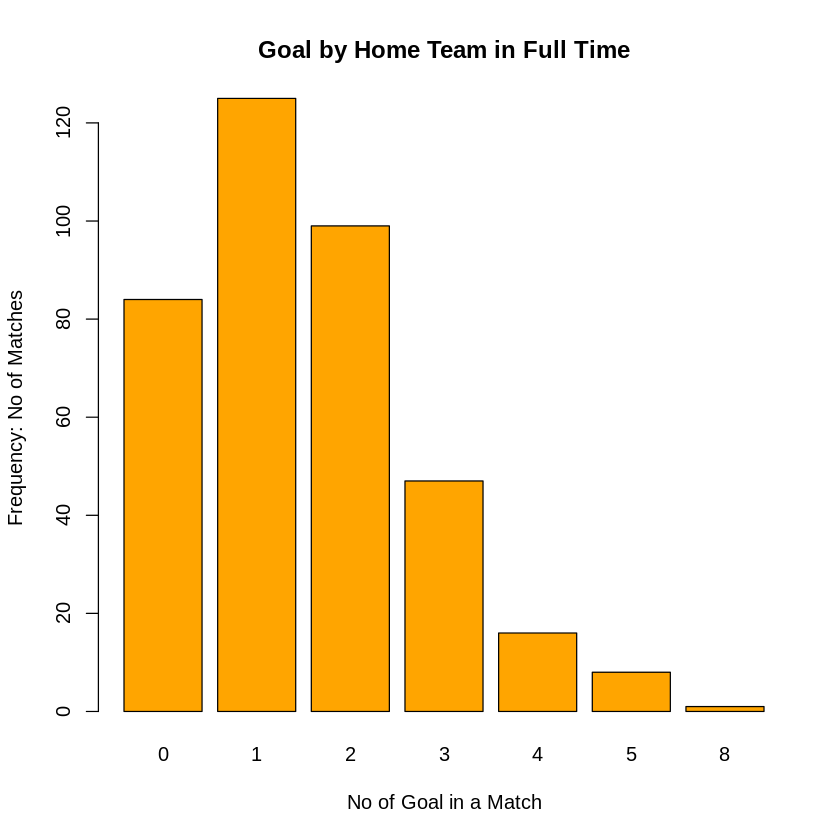

In [ ]:
barplot(FTHG_freq_table,col = 'orange'
         ,main='Goal by Home Team in Full Time'
         ,ylab='Frequency: No of Matches'
         ,xlab='No of Goal in a Match')

In [ ]:
c(round(mean(data$FTHG),3), round(var(data$FTHG),3))

[1] 1.516 1.559

* Number of goals scored by home team in English premier league (EPL) may follow Poisson distribution

* Suppose $X$: Number of goals scored by home team in EPL

* $D=\{X_1,X_2,\cdots,X_n\} \sim_{iid} Poisson(\lambda)$

* $T=\sum_{i=1}^n X_i \sim Poisson(n\lambda)$ is a **sufficient statistics**

* The concept of **sufficient statistics** is accepted and important in both classical frequentist and Bayesian statistics

* One can show:
Fisher's Information in $D$ is equal to Fisher's information in $T$

* Under the exact same prior $p(\lambda)$, one can show:
$$
p(\lambda | x_1,x_2,\cdots,x_n ) = p(\lambda|t) =\frac{f(t|\lambda)p(\lambda)}{\int f(t|\lambda)p(\lambda)d\lambda}
$$

* Consider conjugate prior for Poisson: $\lambda \sim Gamma(a,b)$ where $\mathbb{E}(\lambda)=\frac{a}{b}$

\begin{eqnarray*}
p(\lambda|t)&\propto& f(t|\lambda)p(\lambda)\\
&=& e^{-(n\lambda) }\frac{(n\lambda)^t}{t!}\times \frac{b^a}{\Gamma(a)}e^{-b\lambda}\lambda^{a-1}\\
&=& e^{-(n+b)\lambda}\lambda^{t+a-1}\times \frac{n^tb^a}{t!\Gamma(a)}\\
&\propto& e^{-(n+b)\lambda}\lambda^{t+a-1}
\end{eqnarray*}

* The **posterior distribution** of $\lambda$ is $Gamma(a+t,b+n)$

* The posterior mean is:
\begin{eqnarray*}
\mathbb{E}(\lambda|t)&=&\frac{a+t}{b+n}\\
&=&\frac{b}{b+n}\frac{a}{b}+\frac{n}{b+n}\frac{t}{n}\\
&=&\frac{b}{b+n}\mathbb{E}(\lambda)+\frac{n}{b+n}\bar{X},
\end{eqnarray*}

* Posterior mean is weighted average of prior mean and MLE, where $\bar{X}=\frac{t}{n}=\frac{\sum_{i=1}^nx_i}{n}$ is the MLE of $\lambda$

* Suppose we choose $Gamma(a=10,b=10)$ as prior distribution

In [ ]:
t = sum(data$FTHG)
t

[1] 576

* The posterior is then $Gamma(a+t=10+576,b+n=10+380)$

In [ ]:
t = sum(data$FTHG)
n = nrow(data)
a = 10
b = 10
## MLE
lambda_hat = t/n
cat('MLE of lambda = ',lambda_hat,'\n')
se_mle = sqrt(lambda_hat/n)


## Prior mean of lambda
cat('Prior mean of lambda = ',a/b,'\n')


## Posterior mean
cat('Posterior mean of lambda = ',(t+a)/(n+b),'\n')



MLE of lambda =  1.515789 
Prior mean of lambda =  1 
Posterior mean of lambda =  1.502564 


In [ ]:
## 95% Bayesian credible interval
Bayesian_CI = qgamma(c(0.025,0.5,0.975),shape = t+a,rate=n+b)
cat('Bayesian 95% CI = ', Bayesian_CI,'\n')

## 95% Frequentist Interval
Frequentist_CI = c(lambda_hat-1.96*se_mle,lambda_hat+1.96*se_mle)
cat('Frequentist 95% CI = ', Frequentist_CI,'\n')

## 95% prior Bayesian confidence interval
qgamma(c(0.025,0.5,0.975),shape = a,rate=b)

Bayesian 95% CI =  1.383355 1.501709 1.62663 
Frequentist 95% CI =  1.392 1.639579 


[1] 0.4795389 0.9668715 1.7084803

Sampling distribution
$$
\hat{\lambda}\approx N(\lambda,\frac{\lambda}{n})
$$
Frequentist 95% CI
$$
\hat{\lambda} \pm 1.96 \sqrt{\frac{\hat{\lambda}}{n}}
$$

**Criticism of Bayesian Statistics** How to choose the hyperparameters? In this case a and b of the Gamma distribution

In [ ]:
a=1
b=1
## 95% Bayesian credible interval
Bayesian_CI = qgamma(c(0.025,0.5,0.975),shape = t+a,rate=n+b)
cat('Bayesian 95% CI = ', Bayesian_CI,'\n')

Bayesian 95% CI =  1.393371 1.513561 1.640472 


In [ ]:
a=10
b=10
## 95% Bayesian credible interval
Bayesian_CI = qgamma(c(0.025,0.5,0.975),shape = t+a,rate=n+b)
cat('Bayesian 95% CI = ', Bayesian_CI,'\n')

Bayesian 95% CI =  1.383355 1.501709 1.62663 


In [ ]:
a=100
b=100
## 95% Bayesian credible interval
Bayesian_CI = qgamma(c(0.025,0.5,0.975),shape = t+a,rate=n+b)
cat('Bayesian 95% CI = ', Bayesian_CI,'\n')


Bayesian 95% CI =  1.304155 1.407639 1.516457 


In [ ]:
a=1000
b=1000

## 95% Posterior Bayesian credible interval
Bayesian_CI = qgamma(c(0.025,0.5,0.975),shape = a,rate=b)
cat('Prior Bayesian 95% CI = ', Bayesian_CI,'\n')


## 95% Posterior Bayesian credible interval
Bayesian_CI = qgamma(c(0.025,0.5,0.975),shape = t+a,rate=n+b)
cat('Posterior Bayesian 95% CI = ', Bayesian_CI,'\n')


Prior Bayesian 95% CI =  0.938973 0.9996667 1.062921 
Posterior Bayesian 95% CI =  1.086336 1.141787 1.199095 


$x \sim f(x)$ $y=g(x)$ $x=g'(y)$ $J(x,y)=\frac{\partial x}{\partial y}$

$
h(y)=f(g'(y))\frac{\partial x}{\partial y}
$

$
p(\theta)\propto 1 ~~if ~~\theta \in \mathbb{R}
$

$\lambda \in R^+$ 

$\theta = \log(\lambda)$ $J =\frac{1}{\lambda}$

$p(\lambda) \propto \frac{1}{\lambda}$

$Gamma(a=1,b=0)$

$Gamma(a+t,b+n)$

One approach to avoid this criticism is **Jeffrey's Prior**

* The Jeffreys prior for the rate parameter $\lambda \geq 0$ is
\begin{eqnarray*}
p(\lambda) &\propto& \frac{1}{\sqrt{\lambda}}\\
&\equiv& Gamma(a=\frac{1}{2},b=0)
\end{eqnarray*}

* So **Jeffrey's Prior** for Poisson is an improper prior.

* What about posterior distrinution under Jeffrey's prior?
\begin{eqnarray*}
p(\lambda|t,n) &\propto&  Gamma(a+t=\frac{1}{2}+t~,~b+n=0+n)
\end{eqnarray*}

So if $n>0$, which is trivially true, the __posterior distribution is proper__.


In [ ]:
a=0.5
b=0

## Posterior mean
cat('posterior mean = ',(a+t)/(b+n),'\n')

## 95% Bayesian credible interval
Bayesian_CI = qgamma(c(0.025,0.5,0.975),shape = t+a,rate=n+b)
cat('Bayesian 95% CI = ', Bayesian_CI,'\n')

posterior mean =  1.517105 
Bayesian 95% CI =  1.395775 1.516228 1.64342 


$$
\mathbb{P}(a\leq \lambda \leq b | D) =0.95
$$

**Alternate approach**: 

-  Choose Cauchy distribution for location parameter  (Berger, 1985)
-  Choose Half-Cauchy distribution for scale parameter (Gelman, 2006)

__Why__?

* Mean, variance and other higher order moments does not exists for neither Cauchy nor Half-Cauchy distribution

* The pdf of Half-cauchy distribution:
\begin{eqnarray*}
p(\theta)=\frac{2}{\pi(1+\theta^2)}~~~\theta>0
\end{eqnarray*}


In [ ]:
dHalfCauchy= function(theta,log=FALSE){
  if(log==FALSE){
    return(2/(pi*(1+theta^2)))
  }else{
    return(log(2)-log(pi)-log(1+theta^2))
  }
}

## Test
# dHalfCauchy(theta=1,log=FALSE)
# dHalfCauchy(theta=1,log=TRUE)
# log(dHalfCauchy(theta=1,log=FALSE))

As $T\sim Poisson(n\lambda)$ and $\lambda\sim \text{Half-Cauchy}(0,1)$ the posterior will be proper, i.e.,

\begin{eqnarray*}
p(\lambda | t,n) &\propto& l(\lambda|t,n)p(\lambda)\\
&\propto& e^{-n\lambda}{n\lambda}^{t}\times \frac{2}{\pi(1+\lambda^2)}
\end{eqnarray*}

We will try to estimate the **posterior mode**
$$
\max_{\lambda} p(\lambda | t,n)
$$

In [ ]:
logLike = function(lambda,t,n){
  l = dpois(t,lambda = n*lambda,log=TRUE)
  return(l)
}

logPosterior = function(lambda,t,n){
  lpost = logLike(lambda=lambda,t=t,n=n)+dHalfCauchy(theta=lambda,log=TRUE)
  return(lpost)
}

lambda.init = 1
logPosterior(lambda=lambda.init,t=t,n=n)

[1] -48.82124

one-dimensional optimisation

In [ ]:
optimize(f=logPosterior,lower = 0,upper=10,t=t,n=n,maximum=TRUE)

$maximum
[1] 1.512117

$objective
[1] -5.740236

**Question:** How to estimate posterior mean? Bayesian interval?

**Question:**  What is posterior mean?

$$
\mathbb{E}(\lambda|D)=\int \lambda p(\lambda|D)d\lambda
$$

We don't know $p(\lambda|D)$ fully. We know upto its kernel.

**Question:** What is Bayesian interval?

$$
\mathbb{P}(a \leq \lambda \leq b | D) = 0.95
$$

$$
\int_a^b p(\lambda |D) d\lambda  = 0.95
$$

* So finding posterior mode is an optimisation problem

* Estimation of posterior mean, posterior variance or 95% CI is an integration problem

**Reference**

1.   A. Gelman (2006), "Prior distributions for variance parameters in hierarchical models" *Bayesian Analysis*, Vol. 1, N. 3, pp. 515–533
http://www.stat.columbia.edu/~gelman/research/published/taumain.pdf

2.   N. G. Polson and J. G. Scott (2012), "On the Half-Cauchy Prior for a Global Scale Parameter", *Bayesian Analysis*, Vol. 7, No. 4, pp. 887-902 https://projecteuclid.org/euclid.ba/1354024466



[1] 300

[1] 450

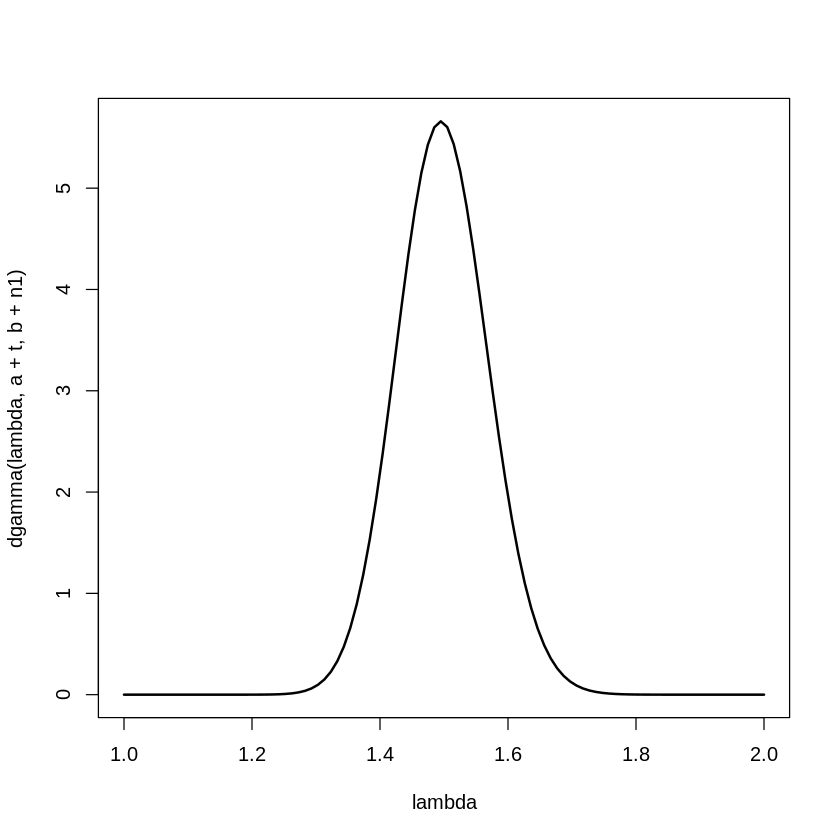

In [ ]:
n1 = 300
length(data$FTHG[1:n1])
t = sum(data$FTHG[1:n1])
t
## lambda ~ Gamma(a+t,b+n)
a = 1
b = 1
lambda = seq(1,2,length.out = 100)
plot(lambda,dgamma(lambda,a + t, b+n1),lwd=2,type='l')

In [ ]:
lamda_star = rgamma(1000,a + t, b+n1)

shapiro.test(lamda_star)


	Shapiro-Wilk normality test

data:  lamda_star
W = 0.99788, p-value = 0.2356
